In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines
import os
plt.style.use(plt.style.available[11])

In [25]:
noises = np.linspace(0, 30, 7, dtype=int)
models = ['gpr', 'svr', 'nn']
colors = ['g', 'b', 'r']
energies = ['Maximum', 'Total', 'Average']
energies_abbrev = ['max', 'tot', 'avg']
modelLineStyles = ['solid', 'dashed' ,'dotted']
train_points = np.linspace(500, 20000, 40, dtype=int)
label_font = 28
legend_font = 16
tick_font = 20
if not os.path.exists('plots'):
    os.mkdir('plots')

dfs = np.array([[None]*7 for i in range(3)])
base_pct_dfs = [None, None, None]
base_mse_dfs = [None, None, None]
for k in range(3):
    base_pct_dfs[k] = pd.read_csv(f'../datasets/base_error/{energies_abbrev[k]}_pct_err.csv')
    base_mse_dfs[k] = pd.read_csv(f'../datasets/base_error/{energies_abbrev[k]}_mse_err.csv')
    
for i, model in enumerate(models):
    for j, noise in enumerate(noises):
        dfs[i, j] = pd.read_csv(f'results/{model}_noise-{noise}/metrics.csv')
display(dfs[0,0].head())
    

,train_points,gpu_memory,time,train_mse_max,train_mse_tot,train_mse_avg,test_mse_noisy_max,test_mse_noisy_tot,test_mse_noisy_avg,test_mse_exact_max,...,train_mape_avg,test_mape_noisy_max,test_mape_noisy_tot,test_mape_noisy_avg,test_mape_exact_max,test_mape_exact_tot,test_mape_exact_avg,test_mape_exact_uncorrected_max,test_mape_exact_uncorrected_tot,test_mape_exact_uncorrected_avg
0,500,1.250203,6.087369,0.000029,7.450780e+11,4.328929e-07,0.000013,6.630791e+11,3.899166e-07,0.000013,...,0.008166,0.014362,0.013605,0.008911,0.014362,0.013605,0.008911,0.014357,0.013610,0.008911
1,1000,1.278849,6.332433,0.000021,4.280335e+12,1.102722e-06,0.000039,4.787234e+12,1.433011e-06,0.000039,...,0.010880,0.014663,0.018848,0.011328,0.014663,0.018848,0.011328,0.014642,0.018800,0.011290
2,1500,1.305542,6.523179,0.000026,5.018594e+12,4.103057e-07,0.000035,3.470104e+12,6.640030e-07,0.000035,...,0.007038,0.013721,0.015418,0.007021,0.013721,0.015418,0.007021,0.013705,0.015368,0.007023
3,2000,1.407756,7.666398,0.000018,4.393041e+12,9.496168e-07,0.000009,3.918459e+12,7.460727e-07,0.000009,...,0.008386,0.006553,0.015079,0.008025,0.006553,0.015079,0.008025,0.006676,0.015019,0.008042
4,2500,1.469604,7.696648,0.000050,3.032414e+12,1.388610e-06,0.000031,2.229467e+12,1.126194e-06,0.000031,...,0.011116,0.011682,0.011774,0.011069,0.011682,0.011774,0.011069,0.012520,0.011701,0.011183


# Training Time

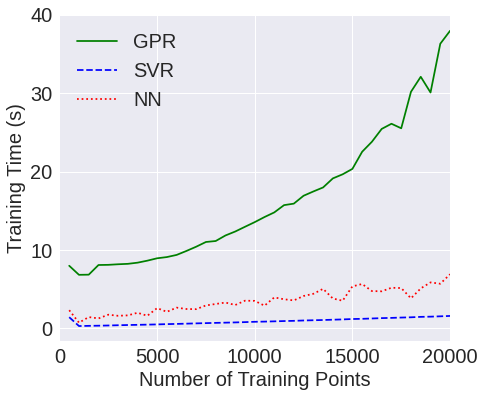

In [26]:
fig, ax = plt.subplots(figsize=(7, 6))
for i, model in enumerate(models):
    times = np.mean(np.array([dfs[i, j]['time'] for j in range(7)]), axis=0)
    ax.plot(dfs[i, j]['train_points'], times, c=colors[i], linestyle = modelLineStyles[i], label=model.upper())
ax.legend(fontsize=20, loc='upper left')
ax.set_xticks([0, 5000, 10000, 15000, 20000])
ax.set_xticklabels([0, 5000, 10000, 15000, 20000], fontsize=tick_font)
ax.set_yticks([0, 10, 20, 30, 40])#, 125, 150, 175, 200])
ax.set_yticklabels([0, 10, 20, 30, 40], fontsize=tick_font)
ax.set_xlim([0, 20000])
ax.set_xlabel('Number of Training Points', fontsize=tick_font)
ax.set_ylabel('Training Time (s)', fontsize=tick_font)
fig.savefig('plots/time.png')

# GPU Memory Consumption

14.025036039806547
1.6210181826636905
1.1219482421875


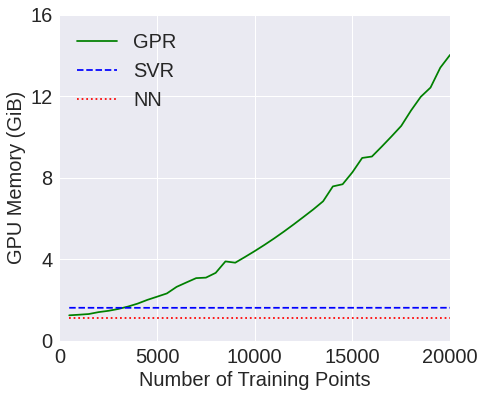

In [27]:
noise = noises[j]
fig, ax = plt.subplots(figsize=(7, 6))
for i, model in enumerate(models):
    mems = np.mean(np.array([dfs[i, j]['gpu_memory'] for j in range(7)]), axis=0)
    ax.plot(dfs[i, j]['train_points'], mems, c=colors[i], linestyle = modelLineStyles[i], label=model.upper())
    print(mems[-1])
ax.legend(fontsize=20, loc='upper left')
ax.set_xticks([0, 5000, 10000, 15000, 20000])
ax.set_xticklabels([0, 5000, 10000, 15000, 20000], fontsize=tick_font)
ax.set_yticks([0, 4, 8, 12, 16])
ax.set_yticklabels([0, 4, 8, 12, 16], fontsize=tick_font)
ax.set_xlim([0, 20000])
ax.set_xlabel('Number of Training Points', fontsize=tick_font)
ax.set_ylabel('GPU Memory (GiB)', fontsize=tick_font)
fig.savefig('plots/gpu_mem.png')

# Testing MAPE

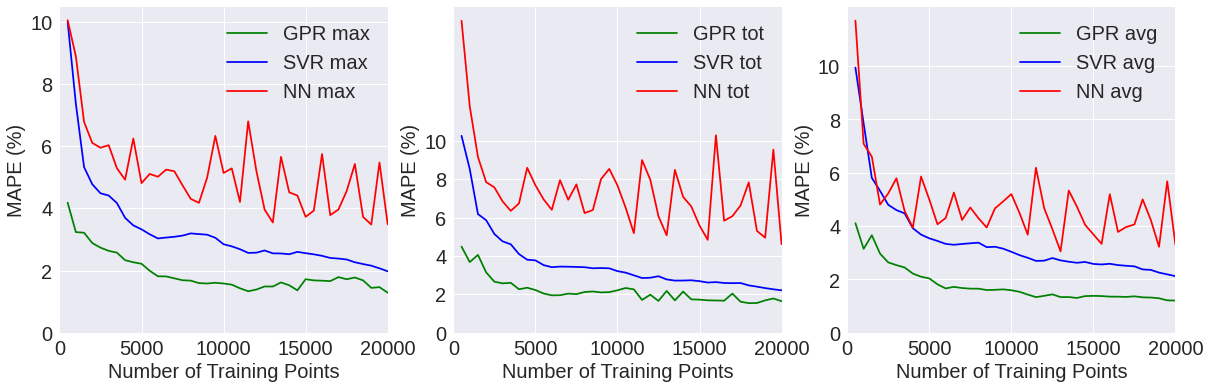

In [28]:
j = 6
noise = noises[j]
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
for k, energy in enumerate(energies_abbrev):
    for i, model in enumerate(models):
        #ax[k].plot(dfs[i, j]['train_points'], dfs[i, j][f'test_mape_noisy_{energy}']*100, c=colors[i], linestyle = modelLineStyles[0], label=model.upper() + ' ' + energy)
        ax[k].plot(dfs[i, j]['train_points'], dfs[i, j][f'test_mape_exact_{energy}']*100, c=colors[i], linestyle = modelLineStyles[0], label=model.upper() + ' ' + energy)
    ax[k].legend(fontsize=20, loc='upper right')
    ax[k].set_xticks([0, 5000, 10000, 15000, 20000])
    ax[k].set_xticklabels([0, 5000, 10000, 15000, 20000], fontsize=tick_font)
    ax[k].set_xlim([0, 20000])
    ax[k].set_xlabel('Number of Training Points', fontsize=tick_font)
    ax[k].set_yticks(np.arange(0, 11, 2, dtype=int))
    ax[k].set_yticklabels(np.arange(0, 11, 2, dtype=int), fontsize=tick_font)
    ax[k].set_ylabel('MAPE (%)', fontsize=tick_font)
fig.savefig('plots/test_mape_noise=' + str(noise) + '.png')

# MAPE v Noise

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

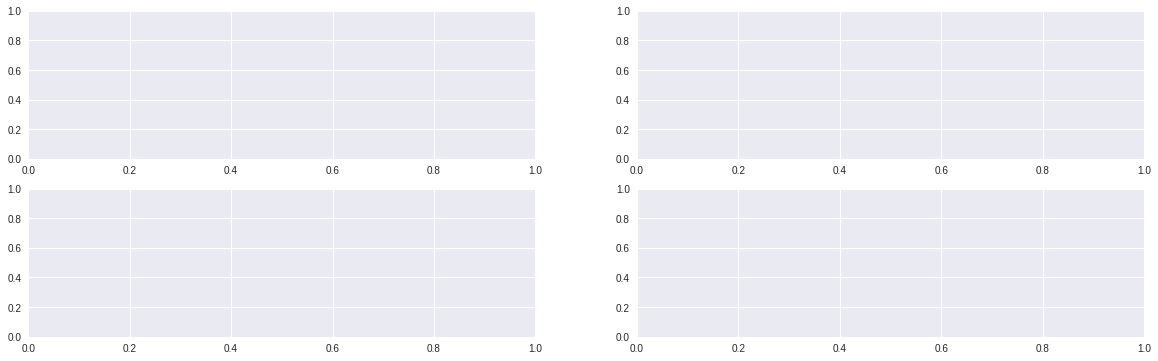

In [31]:
point_idx = 39
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 6))
for k, energy in enumerate(energies_abbrev):
    for i, model in enumerate(models):
        y1 = [dfs[i, j][f'test_mape_noisy_{energy}'][point_idx]*100 for j in range(7)]
        y2 = [dfs[i, j][f'test_mape_exact_{energy}'][point_idx]*100 for j in range(7)]
        ax[k].plot(noises, y1, c=colors[i], linestyle = modelLineStyles[0], label=model.upper() + ' ' + energy)
        ax[k].plot(noises, y2, c=colors[i], linestyle = modelLineStyles[1], label=model.upper() + ' ' + energy)
        #ax[k].plot(dfs[i, j]['train_points'], dfs[i, j][f'test_mape_exact_{energy}']*100, c=colors[i], linestyle = modelLineStyles[i], label=model.upper() + ' ' + energy)
        #ax[k].plot(dfs[i, j]['train_points'], dfs[i, j][f'test_mape_noisy_{energy}']*100, c=colors[i], linestyle = modelLineStyles[i], label=model.upper() + ' ' + energy)
    #ax[k].legend(fontsize=20, loc='upper left')
    ax[k].set_ylim([0, 30])
    ax[k].set_xlim([0, 30])
    ax[k].set_xlabel('Noise Level (%)', fontsize=tick_font)
    ax[k].set_xticks(noises[0:])
    ax[k].set_xticklabels(noises[0:], fontsize=tick_font)
    ax[k].set_yticks(noises)
    ax[k].set_yticklabels(noises[0:], fontsize=tick_font)
    ax[k].set_ylabel('MAPE (%)', fontsize=tick_font)
    ax[k].text(5, 25.5, energies_abbrev[k].upper() + ' KE', fontsize=label_font)
ax[1].set_title(f'points = {train_points[point_idx]}', fontsize=label_font)
fig.savefig('plots/test_mape_points=' + str(round(train_points[point_idx]/1000)) + 'k.png')

# RMSE vs Noise

2000


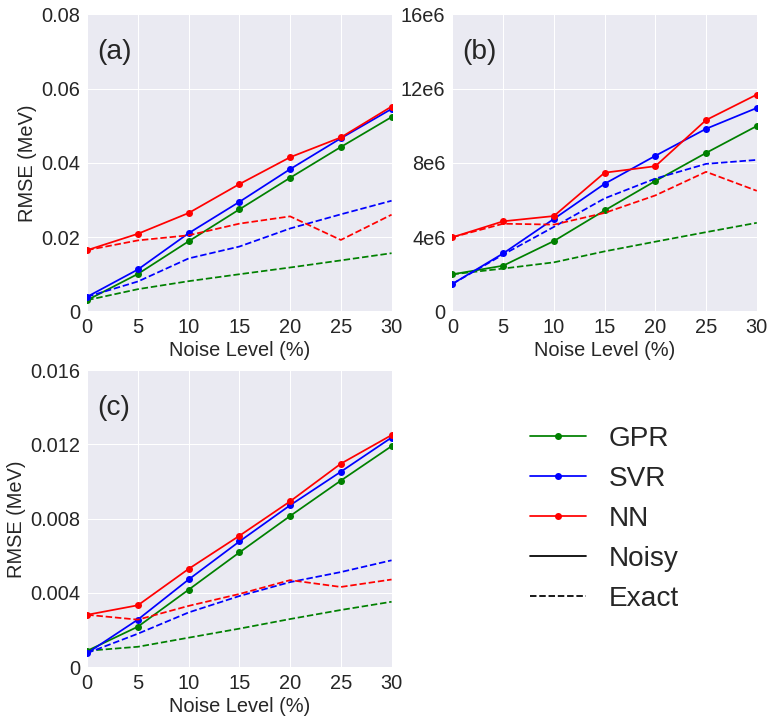

In [33]:
point_idx = 3
foo = ['(a)', '(b)', '(c)']
print(train_points[point_idx])
ylims = [0.08, 16e6, 0.016]
yticks_arr = [[0, 0.02, 0.04, 0.06, 0.08], ['0', '4e6', '8e6', '12e6', '16e6'], [0, 4e-3, 8e-3, 12e-3, 16e-3]]
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(12, 12))
for k, energy in enumerate(energies_abbrev):
    idx1 = 0 if k < 2 else 1
    idx2 = 1 if k==1 else 0
    for i, model in enumerate(models):
        y1 = [np.sqrt(dfs[i, j][f'test_mse_noisy_{energy}'][point_idx]) for j in range(7)]
        y2 = [np.sqrt(dfs[i, j][f'test_mse_exact_{energy}'][point_idx]) for j in range(7)]
        ax[idx1, idx2].plot(noises, y1, c=colors[i], linestyle = modelLineStyles[0], label=model.upper(), marker='o')
        ax[idx1, idx2].plot(noises, y2, c=colors[i], linestyle = modelLineStyles[1])
    #ax[k].legend(fontsize=20, loc='upper left')
    ax[idx1, idx2].set_xlim([0, 30])
    ax[idx1, idx2].set_xlabel('Noise Level (%)', fontsize=tick_font)
    ax[idx1, idx2].set_xticks(noises[0:])
    ax[idx1, idx2].set_xticklabels(noises[0:], fontsize=tick_font)
    ax[idx1, idx2].set_yticks(np.linspace(0, ylims[k], 5))
    ax[idx1, idx2].set_yticklabels(yticks_arr[k],fontsize=tick_font)
    ax[idx1, idx2].set_ylim([0, ylims[k]])
    ax[idx1, idx2].text(1, ylims[k]*.85, foo[k], fontsize=label_font)

ax[0, 0].set_ylabel('RMSE (MeV)', fontsize=tick_font)
ax[1, 0].set_ylabel('RMSE (MeV)', fontsize=tick_font)

# Create Line2D instances for the legend
solid_line = mlines.Line2D([], [], color='black', linestyle='-', label='Noisy')
dashed_line = mlines.Line2D([], [], color='black', linestyle='--', label='Exact')

# Add the custom legend to the subplot
ax[1, 1].axis('off')
handles, labels = ax[0,0].get_legend_handles_labels()  # Get the handles and labels from the first subplot
handles = handles + [solid_line, dashed_line]
labels = labels + ['Noisy', 'Exact']
ax[1, 1].legend(handles, labels, loc='center', fontsize = label_font)
# ax[0].set_title(f'points = {train_points[point_idx]}', fontsize=label_font)
# fig.savefig('plots/test_mse_points=' + str(round(train_points[point_idx]/1000, 1)) + 'k.png')

# Test RMSE 3 Noises

0     0.027666
1     0.030872
2     0.029416
3     0.027559
4     0.029430
5     0.030694
6     0.029833
7     0.031554
8     0.031937
9     0.032431
10    0.031998
11    0.033004
12    0.033392
13    0.033207
14    0.032781
15    0.033001
16    0.033090
17    0.032662
18    0.032576
19    0.032122
20    0.031869
21    0.033537
22    0.033385
23    0.033047
24    0.033409
25    0.033499
26    0.033517
27    0.034051
28    0.034448
29    0.034441
30    0.034477
31    0.034786
32    0.035048
33    0.034939
34    0.035288
35    0.035299
36    0.035303
37    0.035288
38    0.035100
39    0.035220
Name: 15, dtype: float64
0     0.053415
1     0.059753
2     0.057435
3     0.053998
4     0.058916
5     0.061777
6     0.059808
7     0.063307
8     0.063957
9     0.065362
10    0.064399
11    0.066487
12    0.067378
13    0.066816
14    0.065979
15    0.066085
16    0.066223
17    0.065248
18    0.064967
19    0.064005
20    0.063655
21    0.067477
22    0.067136
23    0.066355
24    0.067248


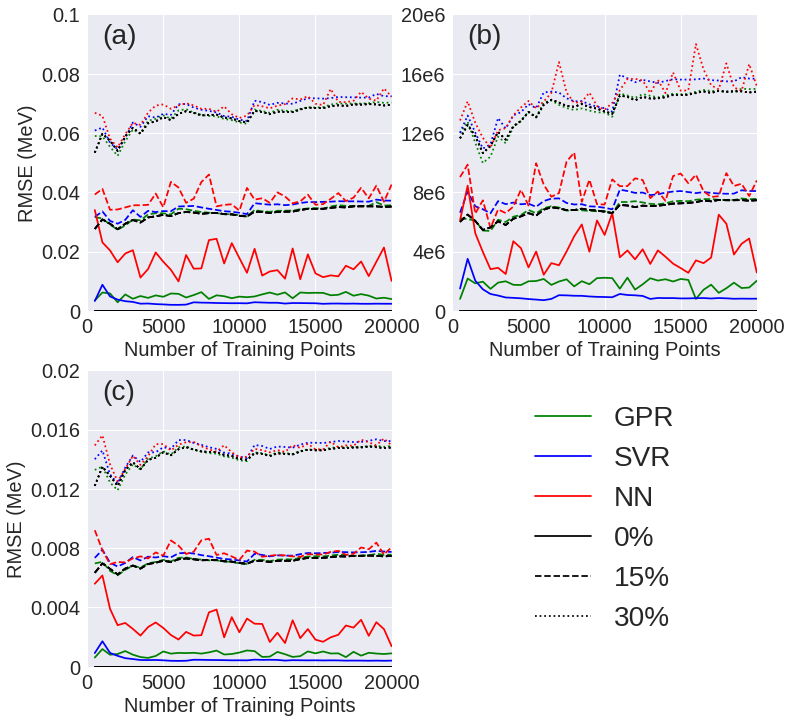

In [34]:
# ylims = [0.1, 20e6, 0.02]
# fig, ax = plt.subplots(nrows=3, figsize=(6, 22))
# for k, energy in enumerate(energies_abbrev):
#     for i, model in enumerate(models):
#         for j, noise in enumerate(noises):
#             map = {0:0, 3:1, 6:2}
#             if noise == 0 or noise == 15 or noise == 30:
#                 #y1 = np.sqrt(dfs[i, j][f'train_mse_{energy}'])
#                 y1 = np.sqrt(dfs[i, j][f'test_mse_noisy_{energy}'])
#                 ax[k].plot(train_points, y1, c=colors[i], linestyle = modelLineStyles[map[j]], label=model.upper() + ' ' + energy)
#     ax[k].set_xticks([0, 5000, 10000, 15000, 20000])
#     ax[k].set_xticklabels([0, 5000, 10000, 15000, 20000], fontsize=tick_font)
#     ax[k].set_xlim([0, 20000])
#     ax[k].set_xlabel('Number of Training Points', fontsize=tick_font)
#     ax[k].set_yticks(np.linspace(0, ylims[k], 6))
#     ax[k].set_yticklabels(['{:.1e}'.format(y) for y in np.linspace(0, ylims[k], 6)],fontsize=tick_font)
#     ax[k].set_ylim([0, ylims[k]])
#     ax[k].text(1000, ylims[k]*.9, energies_abbrev[k].upper() + ' KE', fontsize=label_font)
# ax[0].set_title(f'points = {train_points[point_idx]}', fontsize=label_font)
# fig.savefig('plots/test_rmse_3levels.png')

ylims = [0.1, 20e6, 0.02]
yticks_arr = [[0, 0.02, 0.04, 0.06, 0.08, 0.1], ['0', '4e6', '8e6', '12e6', '16e6', '20e6'], [0, 4e-3, 8e-3, 12e-3, 16e-3, 20e-3]]
foo = ['(a)', '(b)', '(c)']
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(12, 12))
for k, energy in enumerate(energies_abbrev):
    idx1 = 0 if k < 2 else 1
    idx2 = 1 if k==1 else 0
    for i, model in enumerate(models):
        for j, noise in enumerate(noises):
            map = {0:0, 3:1, 6:2}
            if noise == 0:
                #y1 = np.sqrt(dfs[i, j][f'train_mse_{energy}'])
                y1 = np.sqrt(dfs[i, j][f'test_mse_noisy_{energy}'])
                y2 = np.sqrt(base_mse_dfs[k][str(noises[j])])
                ax[idx1, idx2].plot(train_points, y1, c=colors[i], linestyle = modelLineStyles[map[j]], label=model.upper())
                ax[idx1, idx2].plot(train_points, y2, c='k', linestyle = modelLineStyles[map[j]])
            elif noise == 15 or noise == 30:
                y1 = np.sqrt(dfs[i, j][f'test_mse_noisy_{energy}'])
                y2 = np.sqrt(base_mse_dfs[k][str(noises[j])])
                print(y2)
                ax[idx1, idx2].plot(train_points, y1, c=colors[i], linestyle = modelLineStyles[map[j]])
                ax[idx1, idx2].plot(train_points, y2, c='k', linestyle = modelLineStyles[map[j]])

    ax[idx1, idx2].set_xticks([0, 5000, 10000, 15000, 20000])
    ax[idx1, idx2].set_xticklabels([0, 5000, 10000, 15000, 20000], fontsize=tick_font)
    ax[idx1, idx2].set_xlim([0, 20000])
    ax[idx1, idx2].set_xlabel('Number of Training Points', fontsize=tick_font)
    ax[idx1, idx2].set_yticks(np.linspace(0, ylims[k], 6))
    ax[idx1, idx2].set_yticklabels(yticks_arr[k],fontsize=tick_font)
    ax[idx1, idx2].set_ylim([0, ylims[k]])
    ax[idx1, idx2].text(1000, ylims[k]*.9, foo[k], fontsize=label_font)
ax[0, 0].set_ylabel('RMSE (MeV)', fontsize=tick_font)
ax[1, 0].set_ylabel('RMSE (MeV)', fontsize=tick_font)

# Create Line2D instances for the legend
solid_line = mlines.Line2D([], [], color='black', linestyle='-', label='0%')
dashed_line = mlines.Line2D([], [], color='black', linestyle='--', label='15%')
dotted_line = mlines.Line2D([], [], color='black', linestyle=':', label='30%')

# Add the custom legend to the subplot
ax[1, 1].legend(handles=[solid_line, dashed_line, dotted_line], loc='center', fontsize=label_font)
ax[1, 1].axis('off')
handles, labels = ax[0,0].get_legend_handles_labels()  # Get the handles and labels from the first subplot
handles = handles + [solid_line, dashed_line, dotted_line]
labels = labels + ['0%', '15%', '30%']
ax[1, 1].legend(handles, labels, loc='center', fontsize = label_font)
    #fig.savefig('plots/test_rmse_3levels_{}'.format(energies_abbrev[k]))
#ax[0].set_title(f'points = {train_points[point_idx]}', fontsize=label_font)
#fig.savefig('plots/test_rmse_3levels.png')